# The **Monthly Mean** Analysis.

## Import the package we need.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from PIL import Image

## Locate the local file. 

In [43]:
# print(os.getcwd().split("/"))

def get_data_path(data_type) :

    data_path = os.getcwd()

    data_path = data_path.split("/")
    # print(data_path)
    data_path[5] = 'src'
    data_path[6] = 'data'
    data_path.append("")
    data_path[7] = data_type

    temp = ""

    for i in range(0, len(data_path)) :
        temp += data_path[i] + "/"
    
    data_path = temp
    # print(data_path)

    return data_path

In [44]:
data_path = ""
data_type = "monthly_mean"

data_path = get_data_path(data_type)
print(data_path)

os.chdir(data_path)

/Users/linchunho/Developer/ATM-Chem/src/data/monthly_mean//


## $CO_2$

### Load data

First, we read the data and observe the type of the data.

In [45]:
def load_data(data_path, type, skip_rows, data_title) :
    
        for file in os.listdir() :
            if file.startswith(f"{type}") :
                file_path = f"{data_path}/{file}"
                data = pd.read_csv(file_path, skiprows=skip_rows, sep="\s+")
                data = data.replace(-0.99, 0)
                data = data.replace(-9.99, 0)
                data = data.replace(-1   , 0)
                data.columns = data_title

        return data

In [46]:
type = "co2"
skip_rows = 53
data_title = ["year", "month", "date", "avg", "de-s", "day", "std", "unc"]
co2_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(co2_monthly_mean_data)

     year  month       date     avg    de-s  day   std   unc
0    1958      3  1958.2027  315.70  314.43    0  0.00  0.00
1    1958      4  1958.2877  317.45  315.16    0  0.00  0.00
2    1958      5  1958.3699  317.51  314.71    0  0.00  0.00
3    1958      6  1958.4548  317.24  315.14    0  0.00  0.00
4    1958      7  1958.5370  315.86  315.18    0  0.00  0.00
..    ...    ...        ...     ...     ...  ...   ...   ...
770  2022      5  2022.3750  420.99  417.60   30  0.76  0.27
771  2022      6  2022.4583  420.99  418.61   28  0.30  0.11
772  2022      7  2022.5417  418.90  418.59   27  0.57  0.21
773  2022      8  2022.6250  417.19  419.17   27  0.37  0.14
774  2022      9  2022.7083  415.95  419.48   28  0.41  0.15

[775 rows x 8 columns]


### Plot for the monthly mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the diversity of season and the average change of the month.

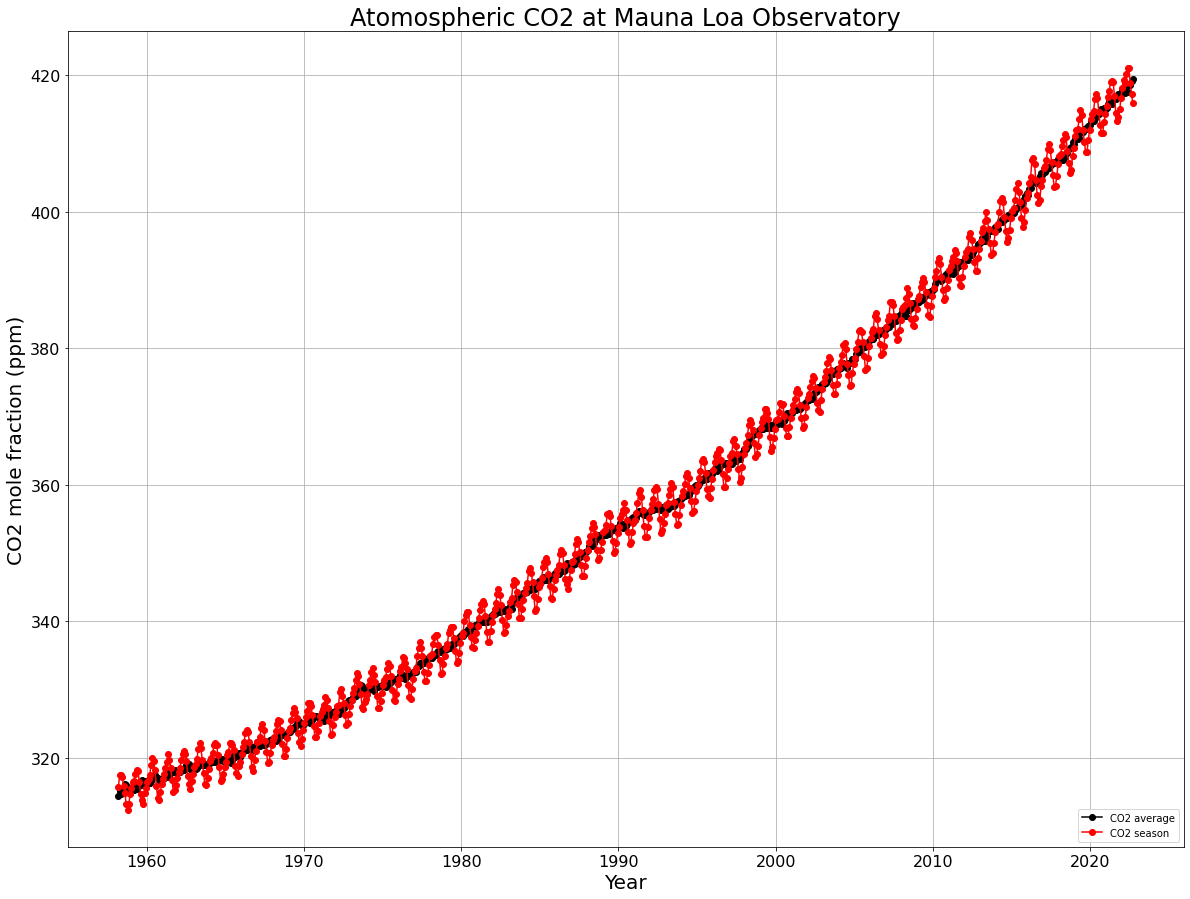

In [47]:
plt.figure(figsize=(20, 15))
plt.plot(co2_monthly_mean_data["date"], co2_monthly_mean_data["de-s"], "k-o")
plt.plot(co2_monthly_mean_data["date"], co2_monthly_mean_data["avg"], "r-o")

plt.xlabel("Year", fontsize=20)
plt.ylabel("CO2 mole fraction (ppm)", fontsize=20)
plt.title("Atomospheric CO2 at Mauna Loa Observatory", fontsize=24)

# plt.tick_params(axis="both", labelsize=16, color="red")
plt.tick_params(axis="both", labelsize=16)
plt.legend(["CO2 average", "CO2 season"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/CO2/co2_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/co2_monthly_mean.jpg", dpi=300)
plt.show()

### Plot for the recent monthly mean.

In [48]:
type = "co2"
skip_rows = 771
data_title = ["year", "month", "date", "avg", "de-s", "day", "std", "unc"]
co2_recent_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(co2_recent_monthly_mean_data)

    year  month       date     avg    de-s  day   std   unc
0   2018      1  2018.0417  408.15  407.82   29  0.55  0.19
1   2018      2  2018.1250  408.52  407.61   28  0.52  0.19
2   2018      3  2018.2083  409.59  408.06   29  0.65  0.23
3   2018      4  2018.2917  410.45  407.65   21  0.90  0.38
4   2018      5  2018.3750  411.44  407.98   24  0.86  0.33
5   2018      6  2018.4583  410.99  408.60   29  0.61  0.22
6   2018      7  2018.5417  408.90  408.59   27  0.46  0.17
7   2018      8  2018.6250  407.16  409.17   31  0.28  0.10
8   2018      9  2018.7083  405.71  409.31   29  0.45  0.16
9   2018     10  2018.7917  406.19  409.56   30  0.32  0.11
10  2018     11  2018.8750  408.21  410.24   24  0.56  0.22
11  2018     12  2018.9583  409.27  409.99   30  0.50  0.17
12  2019      1  2019.0417  411.03  410.66   26  1.26  0.47
13  2019      2  2019.1250  411.96  411.00   27  1.14  0.42
14  2019      3  2019.2083  412.18  410.70   28  1.12  0.40
15  2019      4  2019.2917  413.54  410.

### Plot for the monthly mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the diversity of season and the average change of the month.

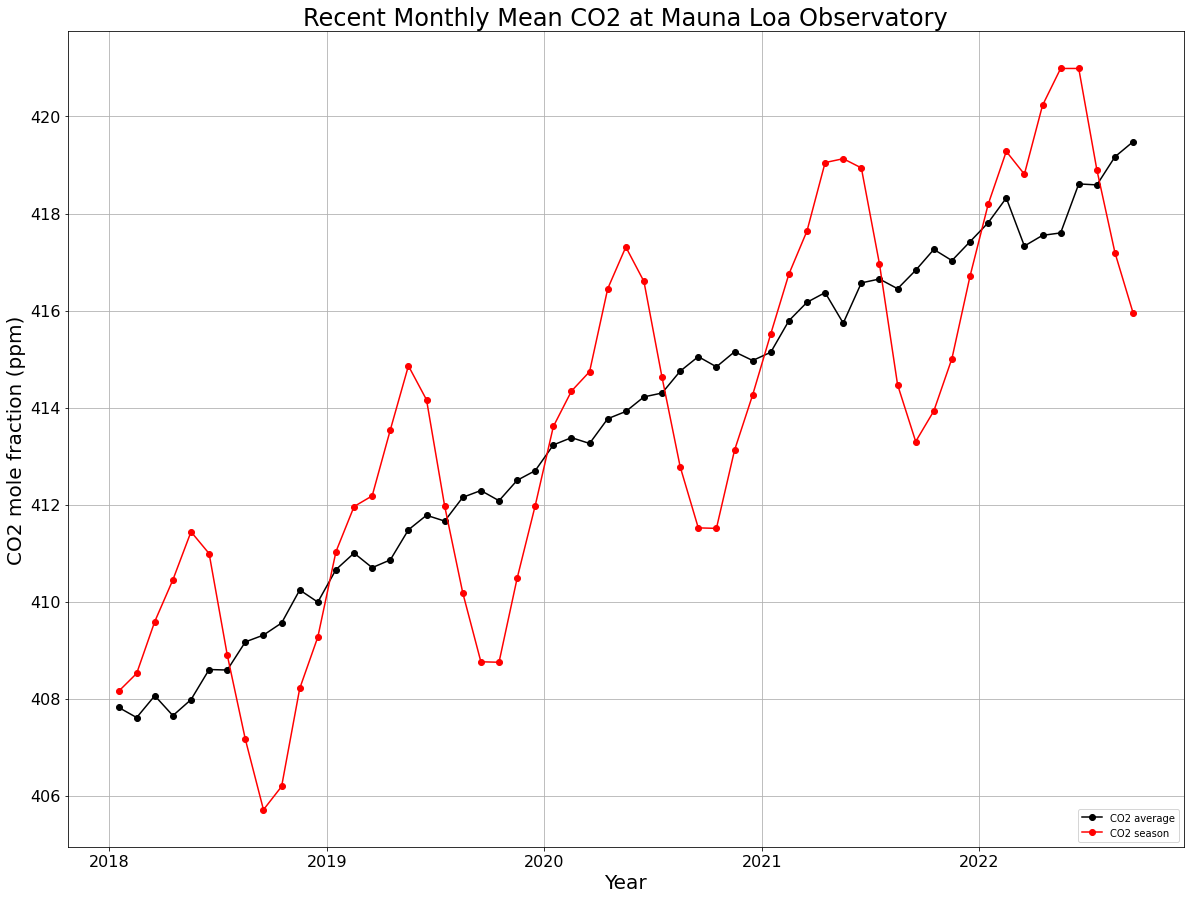

In [49]:
plt.figure(figsize=(20, 15))
plt.plot(co2_recent_monthly_mean_data["date"], co2_recent_monthly_mean_data["de-s"], "k-o")
plt.plot(co2_recent_monthly_mean_data["date"], co2_recent_monthly_mean_data["avg"], "r-o")

plt.xlabel("Year", fontsize=20)
plt.ylabel("CO2 mole fraction (ppm)", fontsize=20)
plt.title("Recent Monthly Mean CO2 at Mauna Loa Observatory", fontsize=24)

# plt.tick_params(axis="both", labelsize=16, color="red")
plt.tick_params(axis="both", labelsize=16)
plt.legend(["CO2 average", "CO2 season"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/CO2/co2_recent_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/co2_recent_monthly_mean.jpg", dpi=300)
plt.show()

## $CH_4$

### Load data

First, we read the data and observe the type of the data.

In [50]:
type = "ch4"
skip_rows = 64
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
ch4_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(ch4_monthly_mean_data)

     year  month      date      avg  avg_unc    trend  trend_unc
0    1983      7  1983.542  1626.58     2.10  1635.31       1.39
1    1983      8  1983.625  1627.88     2.69  1635.92       1.33
2    1983      9  1983.708  1638.49     2.33  1636.53       1.27
3    1983     10  1983.792  1644.80     1.59  1637.16       1.20
4    1983     11  1983.875  1642.58     0.78  1637.83       1.12
..    ...    ...       ...      ...      ...      ...        ...
463  2022      2  2022.125  1907.94     0.00  1907.19       0.00
464  2022      3  2022.208  1909.23     0.00  1908.37       0.00
465  2022      4  2022.292  1909.98     0.00  1909.49       0.00
466  2022      5  2022.375  1908.67     0.00  1910.50       0.00
467  2022      6  2022.458  1906.11     0.00  1911.40       0.00

[468 rows x 7 columns]


### Plot for the monthly mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the trend and the average change of the month.

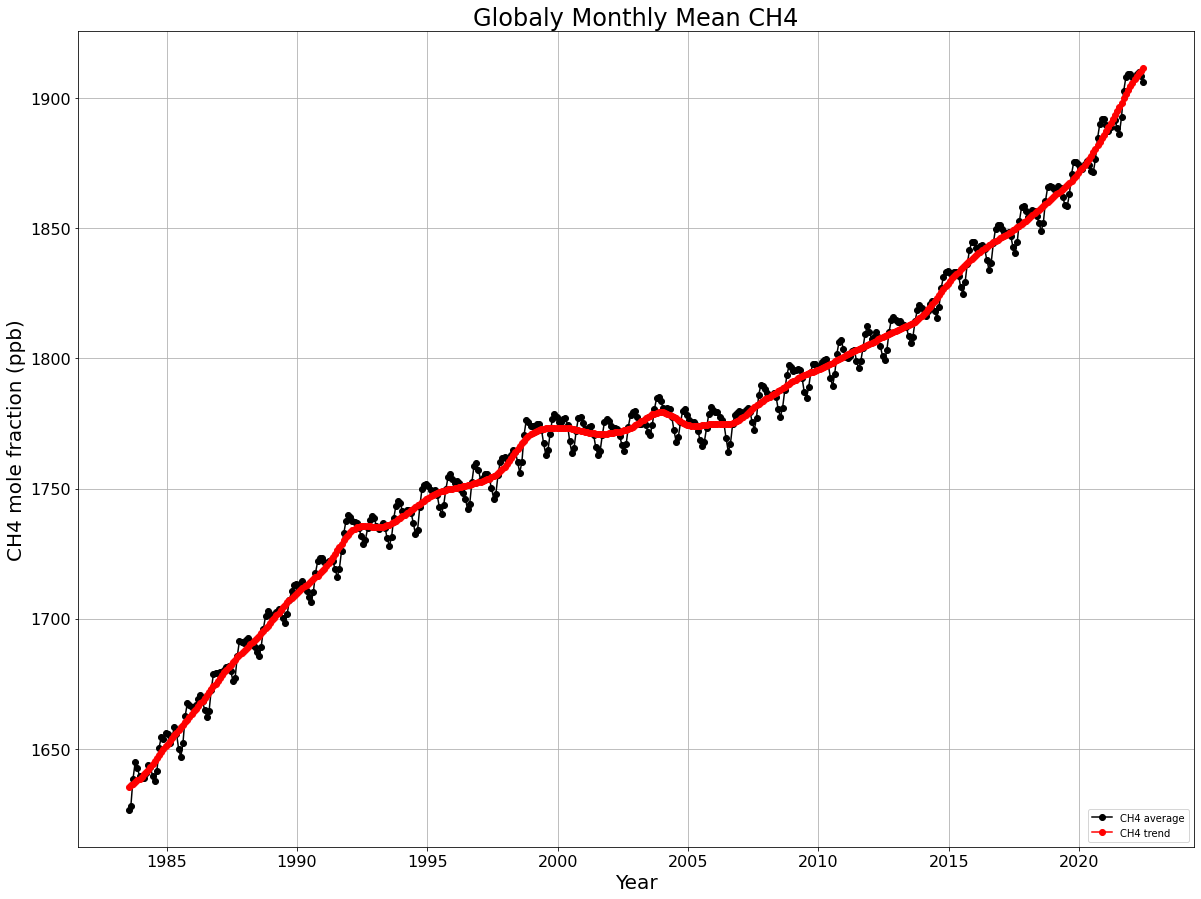

In [51]:
plt.figure(figsize=(20, 15))
plt.plot(ch4_monthly_mean_data["date"], ch4_monthly_mean_data["avg"], "k-o")
plt.plot(ch4_monthly_mean_data["date"], ch4_monthly_mean_data["trend"], "r-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("CH4 mole fraction (ppb)", fontsize=20)
plt.title("Globaly Monthly Mean CH4", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["CH4 average", "CH4 trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/CH4/ch4_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/ch4_monthly_mean.jpg", dpi=300)
plt.show()

In [52]:
type = "ch4"
skip_rows = 478
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
ch4_recent_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(ch4_recent_monthly_mean_data)

    year  month      date      avg  avg_unc    trend  trend_unc
0   2018      1  2018.042  1854.47     1.02  1853.60       0.73
1   2018      2  2018.125  1854.94     0.95  1854.29       0.75
2   2018      3  2018.208  1856.86     0.95  1854.98       0.77
3   2018      4  2018.292  1856.67     1.09  1855.71       0.80
4   2018      5  2018.375  1854.78     1.65  1856.45       0.81
5   2018      6  2018.458  1851.99     1.67  1857.19       0.83
6   2018      7  2018.542  1849.04     1.58  1857.93       0.84
7   2018      8  2018.625  1851.88     1.69  1858.68       0.85
8   2018      9  2018.708  1860.47     0.97  1859.41       0.84
9   2018     10  2018.792  1865.73     0.95  1860.14       0.84
10  2018     11  2018.875  1866.22     1.04  1860.86       0.83
11  2018     12  2018.958  1866.02     1.00  1861.58       0.81
12  2019      1  2019.042  1865.00     1.10  1862.30       0.78
13  2019      2  2019.125  1864.96     0.78  1862.99       0.76
14  2019      3  2019.208  1866.26     0

## Plot for the recent monthly mean.

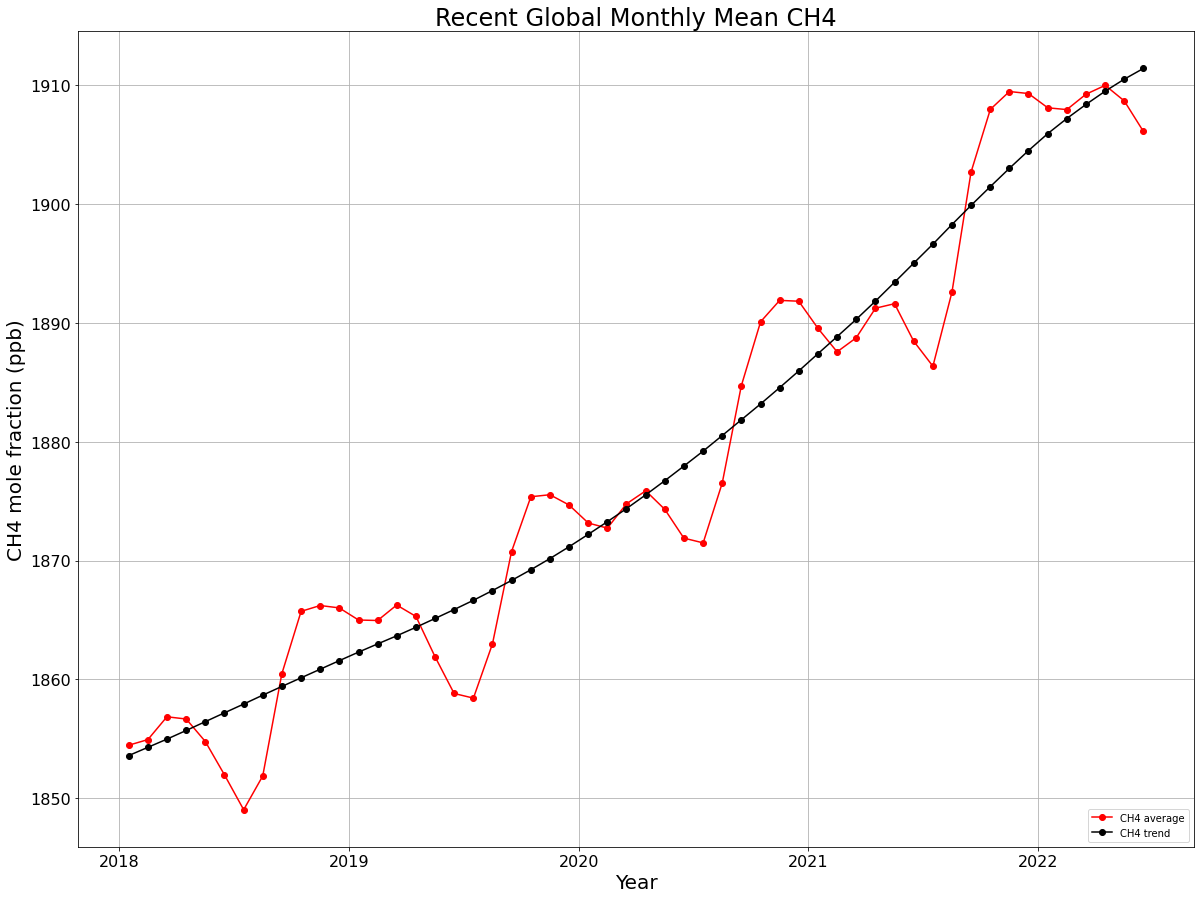

In [53]:
plt.figure(figsize=(20, 15))
plt.plot(ch4_recent_monthly_mean_data["date"], ch4_recent_monthly_mean_data["avg"], "r-o")
plt.plot(ch4_recent_monthly_mean_data["date"], ch4_recent_monthly_mean_data["trend"], "k-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("CH4 mole fraction (ppb)", fontsize=20)
plt.title("Recent Global Monthly Mean CH4", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["CH4 average", "CH4 trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/CH4/ch4_recent_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/ch4_recent_monthly_mean.jpg", dpi=300)
plt.show()

## $N_{2}O$

### Load data

First, we read the data and observe the type of the data.

In [54]:
type = "n2o"
skip_rows = 64
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
n2o_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(n2o_monthly_mean_data)

     year  month      date     avg  avg_unc   trend  trend_unc
0    2001      1  2001.042  316.30     0.17  316.03       0.16
1    2001      2  2001.125  316.31     0.18  316.09       0.16
2    2001      3  2001.208  316.21     0.17  316.15       0.16
3    2001      4  2001.292  316.12     0.15  316.22       0.16
4    2001      5  2001.375  316.11     0.15  316.28       0.15
..    ...    ...       ...     ...      ...     ...        ...
253  2022      2  2022.125  335.35     0.00  335.16       0.00
254  2022      3  2022.208  335.40     0.00  335.27       0.00
255  2022      4  2022.292  335.46     0.00  335.38       0.00
256  2022      5  2022.375  335.48     0.00  335.49       0.00
257  2022      6  2022.458  335.48     0.00  335.60       0.00

[258 rows x 7 columns]


### Plot for the monthly mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the trend and the average change of the month.

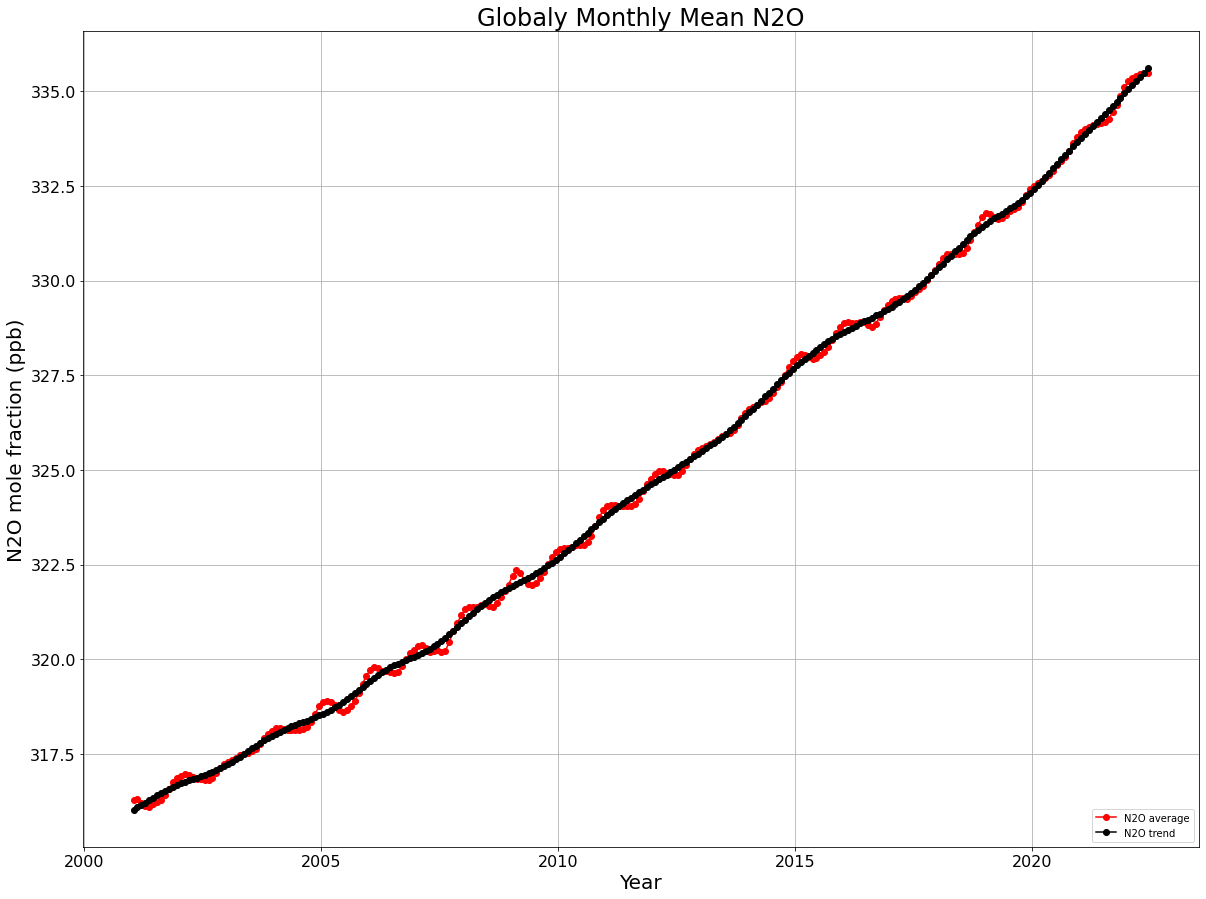

In [55]:
plt.figure(figsize=(20, 15))
plt.plot(n2o_monthly_mean_data["date"], n2o_monthly_mean_data["avg"], "r-o")
plt.plot(n2o_monthly_mean_data["date"], n2o_monthly_mean_data["trend"], "k-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("N2O mole fraction (ppb)", fontsize=20)
plt.title("Globaly Monthly Mean N2O", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["N2O average", "N2O trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/N2O/n2o_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/n2o_monthly_mean.jpg", dpi=300)
plt.show()

In [56]:
type = "n2o"
skip_rows = 268
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
n2o_recent_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(n2o_recent_monthly_mean_data)

    year  month      date     avg  avg_unc   trend  trend_unc
0   2018      1  2018.042  330.45     0.13  330.35       0.12
1   2018      2  2018.125  330.60     0.13  330.45       0.13
2   2018      3  2018.208  330.69     0.14  330.56       0.13
3   2018      4  2018.292  330.71     0.14  330.66       0.13
4   2018      5  2018.375  330.70     0.13  330.77       0.13
5   2018      6  2018.458  330.70     0.13  330.87       0.12
6   2018      7  2018.542  330.74     0.13  330.97       0.12
7   2018      8  2018.625  330.87     0.13  331.07       0.12
8   2018      9  2018.708  331.07     0.13  331.17       0.12
9   2018     10  2018.792  331.28     0.12  331.26       0.12
10  2018     11  2018.875  331.48     0.12  331.34       0.12
11  2018     12  2018.958  331.68     0.13  331.42       0.12
12  2019      1  2019.042  331.79     0.13  331.50       0.12
13  2019      2  2019.125  331.75     0.13  331.57       0.12
14  2019      3  2019.208  331.67     0.13  331.64       0.12
15  2019

### Plot for the recent monthly mean.

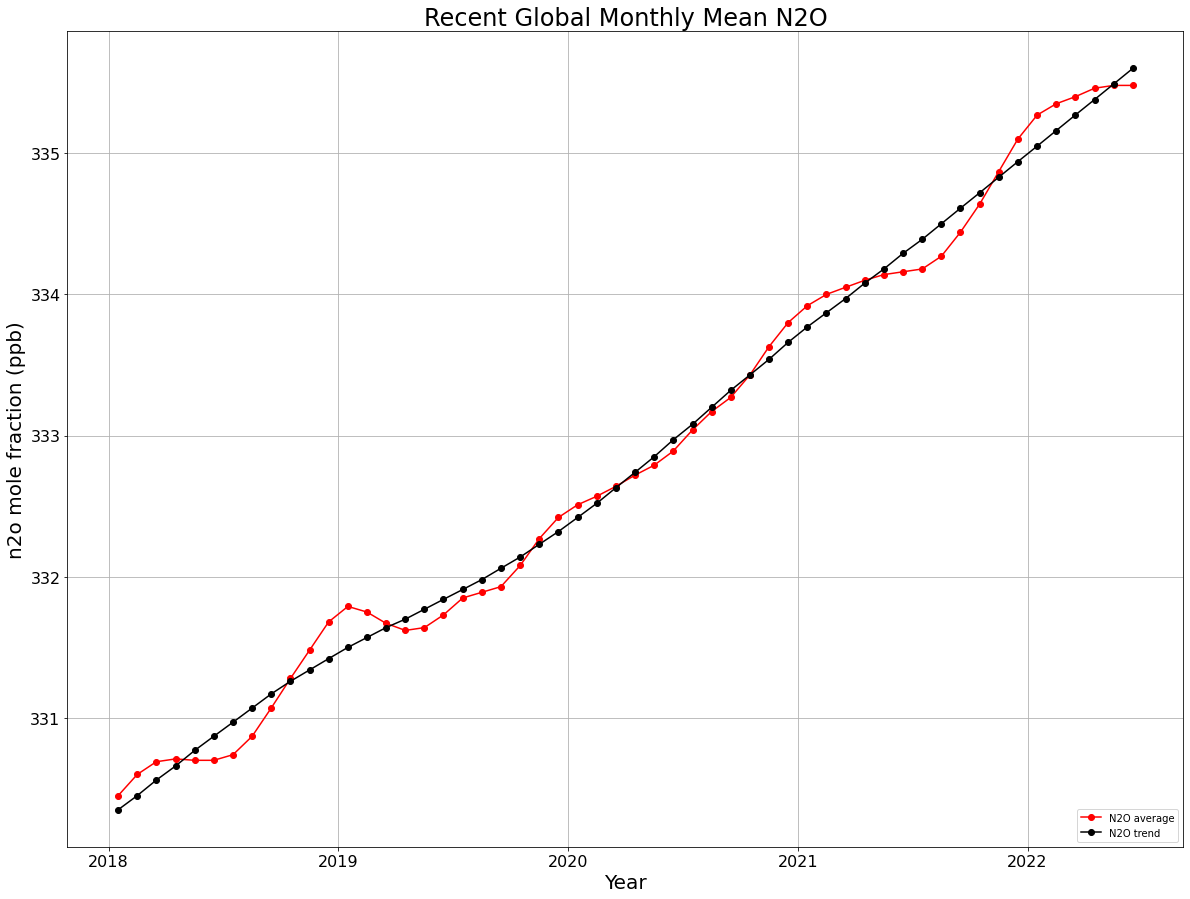

In [57]:
plt.figure(figsize=(20, 15))
plt.plot(n2o_recent_monthly_mean_data["date"], n2o_recent_monthly_mean_data["avg"], "r-o")
plt.plot(n2o_recent_monthly_mean_data["date"], n2o_recent_monthly_mean_data["trend"], "k-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("n2o mole fraction (ppb)", fontsize=20)
plt.title("Recent Global Monthly Mean N2O", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["N2O average", "N2O trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/n2o/n2o_recent_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/n2o_recent_monthly_mean.jpg", dpi=300)
plt.show()

## $SF_{6}$

### Load data

First, we read the data and observe the type of the data.

In [58]:
type = "sf6"
skip_rows = 63
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
sf6_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(sf6_monthly_mean_data)

     year  month      date    avg  avg_unc  trend  trend_unc
0    1997      7  1997.542   4.00     0.01   4.01        0.0
1    1997      8  1997.625   4.00     0.01   4.02        0.0
2    1997      9  1997.708   4.02     0.01   4.04        0.0
3    1997     10  1997.792   4.05     0.01   4.06        0.0
4    1997     11  1997.875   4.08     0.01   4.08        0.0
..    ...    ...       ...    ...      ...    ...        ...
295  2022      2  2022.125  10.88     0.00  10.88        0.0
296  2022      3  2022.208  10.92     0.00  10.91        0.0
297  2022      4  2022.292  10.96     0.00  10.94        0.0
298  2022      5  2022.375  10.99     0.00  10.97        0.0
299  2022      6  2022.458  11.01     0.00  11.01        0.0

[300 rows x 7 columns]


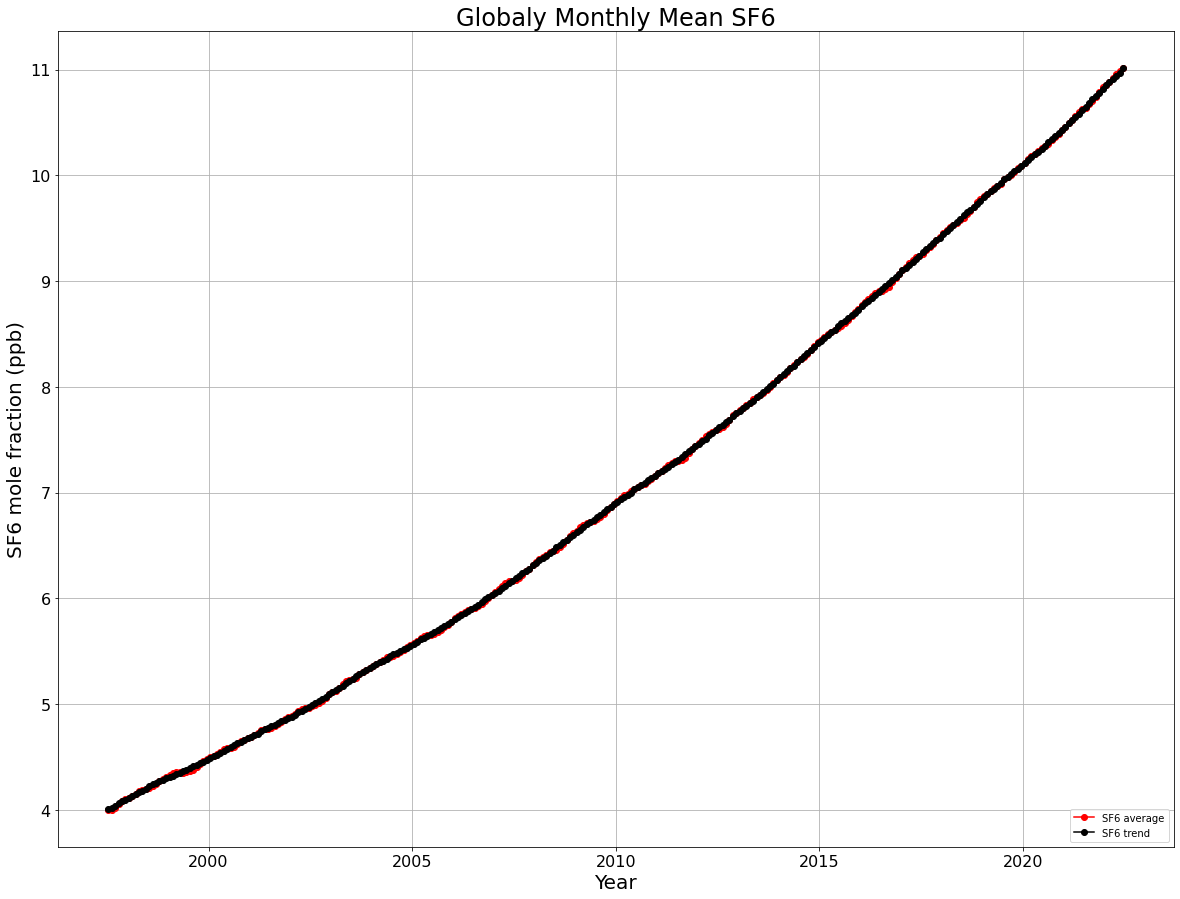

In [59]:
plt.figure(figsize=(20, 15))
plt.plot(sf6_monthly_mean_data["date"], sf6_monthly_mean_data["avg"], "r-o")
plt.plot(sf6_monthly_mean_data["date"], sf6_monthly_mean_data["trend"], "k-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("SF6 mole fraction (ppb)", fontsize=20)
plt.title("Globaly Monthly Mean SF6", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["SF6 average", "SF6 trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/SF6/sf6_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/sf6_monthly_mean.jpg", dpi=300)
plt.show()

### Plot for the monthly mean.

After we load the data what we need. Then we plot the relationship between the data. First, we pick up the trend and the average change of the month.

### Plot for the recent monthly mean.

In [60]:
type = "sf6"
skip_rows = 310
data_title = ["year", "month", "date", "avg", "avg_unc", "trend", "trend_unc"]
sf6_recent_monthly_mean_data = load_data(data_path, type, skip_rows, data_title)

print(sf6_recent_monthly_mean_data)

    year  month      date    avg  avg_unc  trend  trend_unc
0   2018      1  2018.042   9.45     0.01   9.44       0.01
1   2018      2  2018.125   9.48     0.01   9.47       0.01
2   2018      3  2018.208   9.51     0.01   9.50       0.01
3   2018      4  2018.292   9.53     0.01   9.53       0.01
4   2018      5  2018.375   9.55     0.01   9.56       0.01
5   2018      6  2018.458   9.58     0.01   9.59       0.01
6   2018      7  2018.542   9.60     0.01   9.62       0.01
7   2018      8  2018.625   9.63     0.01   9.65       0.01
8   2018      9  2018.708   9.66     0.01   9.67       0.01
9   2018     10  2018.792   9.70     0.01   9.70       0.01
10  2018     11  2018.875   9.75     0.01   9.73       0.01
11  2018     12  2018.958   9.78     0.01   9.76       0.01
12  2019      1  2019.042   9.80     0.01   9.79       0.01
13  2019      2  2019.125   9.82     0.01   9.82       0.00
14  2019      3  2019.208   9.85     0.01   9.85       0.00
15  2019      4  2019.292   9.88     0.0

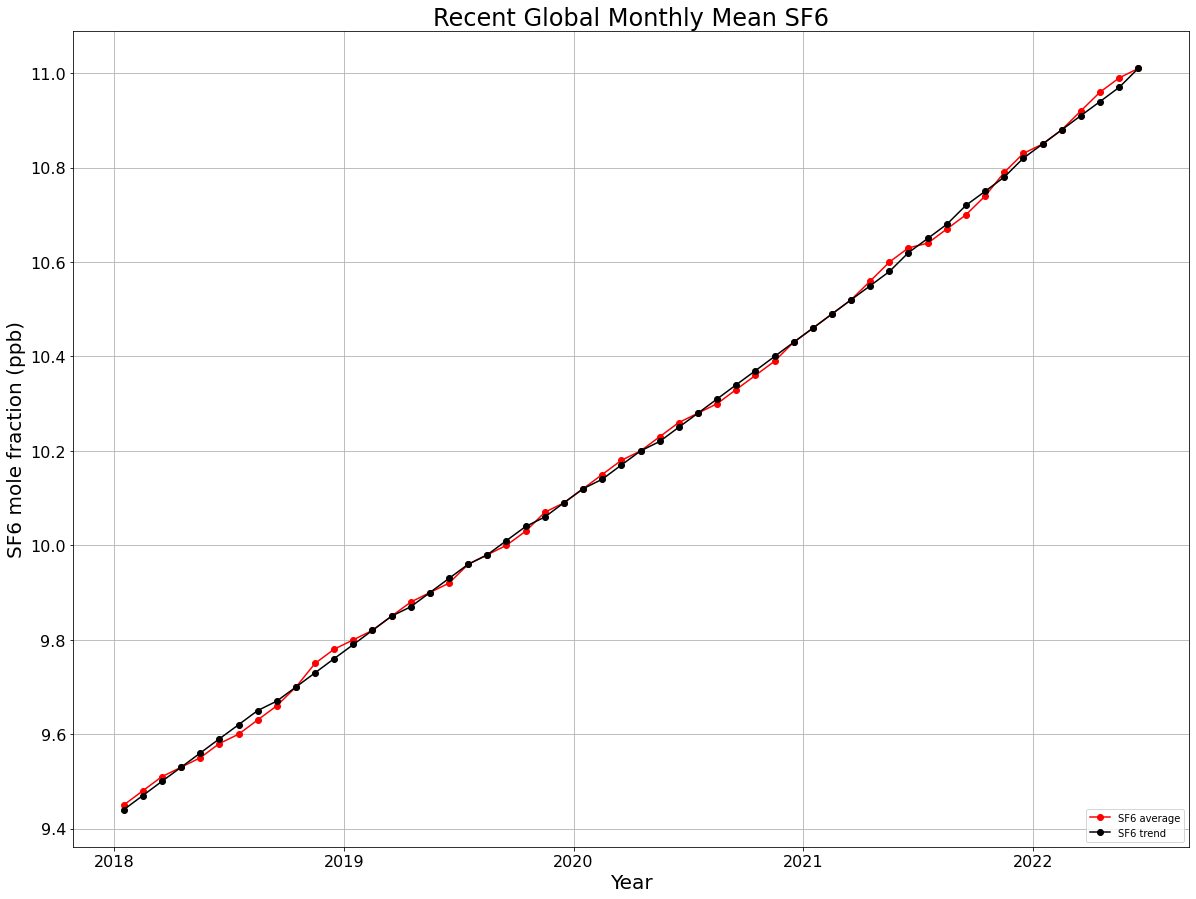

In [61]:
plt.figure(figsize=(20, 15))
plt.plot(sf6_recent_monthly_mean_data["date"], sf6_recent_monthly_mean_data["avg"], "r-o")
plt.plot(sf6_recent_monthly_mean_data["date"], sf6_recent_monthly_mean_data["trend"], "k-o")


plt.xlabel("Year", fontsize=20)
plt.ylabel("SF6 mole fraction (ppb)", fontsize=20)
plt.title("Recent Global Monthly Mean SF6", fontsize=24)

plt.tick_params(axis="both", labelsize=16)
plt.legend(["SF6 average", "SF6 trend"], loc ="lower right")

plt.grid()
plt.savefig("../../imgs/SF6/sf6_recent_monthly_mean.jpg", dpi=300)
plt.savefig("../../imgs/monthly_mean/sf6_recent_monthly_mean.jpg", dpi=300)
plt.show()

## Add my own watermark

![plot](../../src/imgs/1chooo/icon.png)

In [91]:
def add_water_mark(imgs_path) :
        os.chdir(imgs_path)

        imgs = glob.glob('./*.jpg')
        icon = Image.open('../1chooo/icon.png')
        icon_w, icon_h = icon.size

        for i in imgs:
            name = i.split('/')[::-1][0]   
            img = Image.open(i)    
            img_w, img_h = img.size

            x = int((img_w + icon_w))
            y = int((img_h + icon_h))
            # x = int(img_w - icon_w)
            # y = int(img_h - icon_h)
            img.paste(icon, (750, 550), icon)   
            img.save(f'../watermark/{name}')

        return

In [77]:
def get_imgs_path() :
    
    imgs_path = os.getcwd().split("/")
    temp = ""

    imgs_path[6] = 'imgs'
    imgs_path[7] = 'monthly_mean'

    for i in range(0, len(imgs_path)) :
        temp += imgs_path[i] + "/"
    
    imgs_path = temp
    
    # print(imgs_path)

    return imgs_path

In [92]:
imgs_path = get_imgs_path()

os.chdir(imgs_path)

add_water_mark(imgs_path)